
Part 1: Neural Network
Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


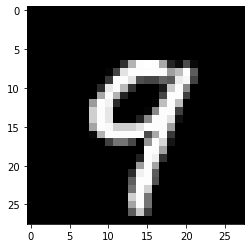

In [3]:

print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

In [4]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


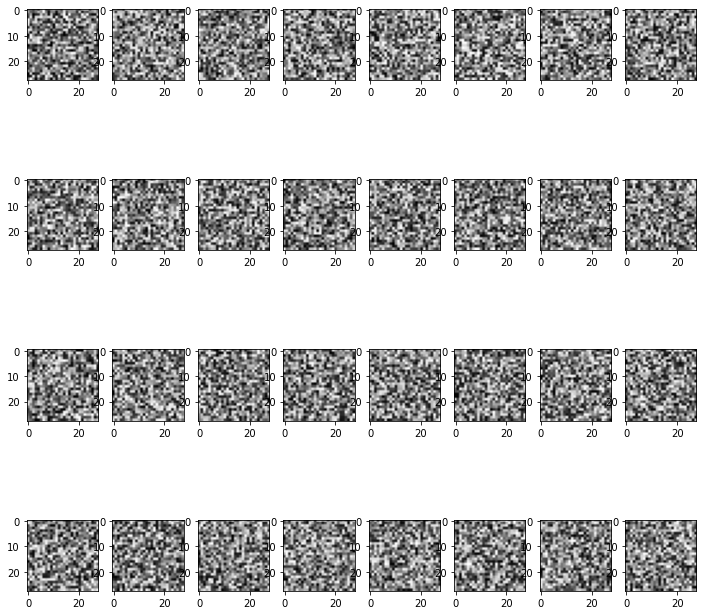

In [5]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [6]:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training

In [7]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 2s 2ms/step - loss: 1.9687 - accuracy: 0.3552
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 0.8019 - accuracy: 0.8011


Testing

In [8]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4873942732810974
Test accuracy: 0.8812999725341797


Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


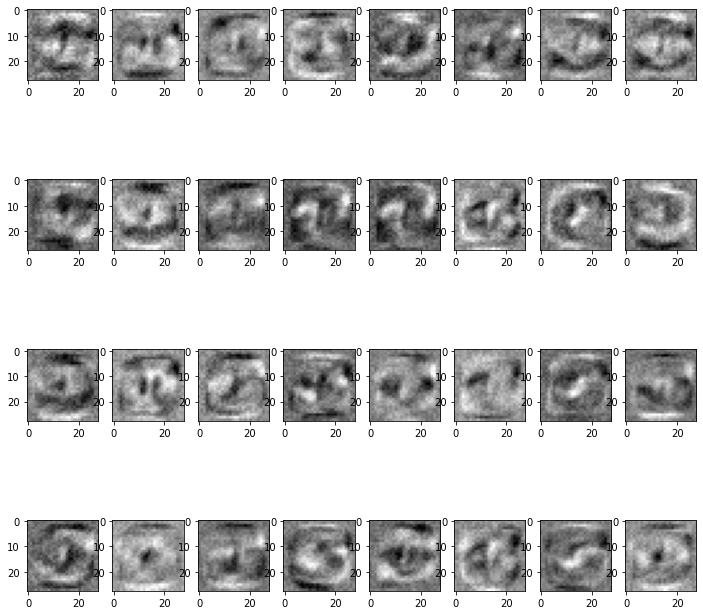

In [9]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [10]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [2.2636948e-03 2.9821828e-04 7.0938550e-02 5.5994075e-05 2.7525725e-02
 7.3319580e-04 8.8944507e-01 1.7553481e-04 4.9387864e-03 3.6252998e-03]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


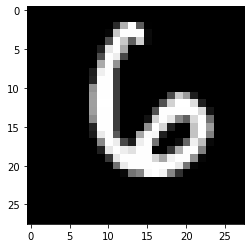

In [14]:
# Write the index of the test sample to show
plt.imshow(x_test[88:89].reshape(28,28),cmap='gray')
plt.show()

User Input

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

In [20]:

# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Sigmoid Activation Function

In [18]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 2.1922 - accuracy: 0.2535 - val_loss: 1.7348 - val_accuracy: 0.5564
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 1.6106 - accuracy: 0.6006 - val_loss: 1.2632 - val_accuracy: 0.6900
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 1.1901 - accuracy: 0.694

Part 4: Design Choices in Neural Networks

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 2ms/step - loss: 2.1155 - accuracy: 0.3557 - val_loss: 1.3391 - val_accuracy: 0.7010
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 1.1581 - accuracy: 0.7392 - val_loss: 0.7335 - val_accuracy: 0.8219
Test loss: 0.7335109114646912
Test accuracy: 0.8219000101089478
Shape of First Layer (784, 8)
Visual

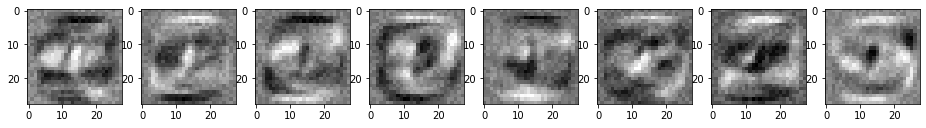

In [17]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Lower number of Layers. For example 1 hidden layer

In [16]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                